## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# import data
df = pd.read_excel('titanic.xlsx')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [3]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [4]:
df.sample(5)

,survived,name,sex,age
393,1,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0
68,1,"Chevre, Mr. Paul Romaine",male,45.0
161,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0
178,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0
273,1,"Spedden, Master. Robert Douglas",male,6.0


Observation:


1. All columns except "age" are categorical.

2. The "survived" variable is binary (0,1).

3. The "sex" variable contains distinct values: "female" and "male".

4. There appears a variable with missing values, particularly in 'age'. This issue will be handle next

4. There are no significant issues found in the data (column names match the entries).




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


1. The data contains 4 columns with 500 rows.  
2. Only the **"age"** variable has missing values, which will be processed further.  
3. The **"age"** data contains float values, and values below 1 will be considered as observations with an age of less than 1 year. Need a comfirmation from the source of dataset
4. Otherwise, the data appears to align with the column names.

#Statistical Summary

In [6]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [7]:
categoric = ['name', 'sex']
numeric = ['survived','age']

In [8]:
df[numeric].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


1. Overall, the minimum and maximum values seem reasonable for this variable.  
2. The **"age"** variable has a minimum value of 0.6, which can be considered as an age of less than 1 year.  
3. The mean is approximately 50% (Median), indicating that the variable is close to a normal distribution.  
4. The **"survived"** variable is binary (0 and 1), so there is no need to conclude its symmetry. It only needs to be checked for balance.

In [9]:
df[categoric].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


1. Both name and **sex** columns have 500 entries with no missing values.

2. There are 499 unique names, indicating one duplicate entry: "Eustis, Miss. Elizabeth Mussey", which suggests a potential duplicate that may need further checking.

3. The dataset contains 288 males and 212 females, showing that males are more represented.

In [10]:
#untuk mengetahui berapa banyak gender dan status survived dengan detail
print(df['sex'].value_counts(), '\n')
print(df['survived'].value_counts())

sex
male      288
female    212
Name: count, dtype: int64 

survived
1    270
0    230
Name: count, dtype: int64




1.   For gender, it is true that "male" appears in more rows than "female".
2.   It shows that most passengers survived, with 270 survivors, while the rest did not.



In [11]:
print(df['age'].value_counts())

age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     1
45.5000     1
13.0000     1
67.0000     1
12.0000     1
0.8333      1
0.6667      1
7.

The **"age"** variable shows that the most common age is 24 years, with 23 passengers, followed by 30 years, with 20 passengers.

#Cleaning Data

##Handling Duplicate

In [12]:
len(df.drop_duplicates())/len(df)
#Hasil menunjukkan bahwa benar terdapat baris yang duplicate

0.998

In [13]:
duplicates = df[df.duplicated(keep=False)]
duplicates
#Asumsi seelumnya benar, ada duplicate data pada baris 104 dan baris 349

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [14]:
#Handling Drop duplicate
data = df.drop_duplicates()
len(data.drop_duplicates())/len(data)

#====== Handling Duplicate Data Finish ==============

1.0

Handling data duplicate telah dilakukan

#Handling Missing Value

In [15]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [16]:
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)")

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


Terdapat 49 data missing value pada variabel **age**. Variabel lainnya telah lengkap.

Persentase missing value adalah 9.82% yang dimana berada dibawah 20%. Oleh karena itu, missing value ini dapat kita handling dengan **Median Imputation**, hal ini karena data **age** adalah data numerik

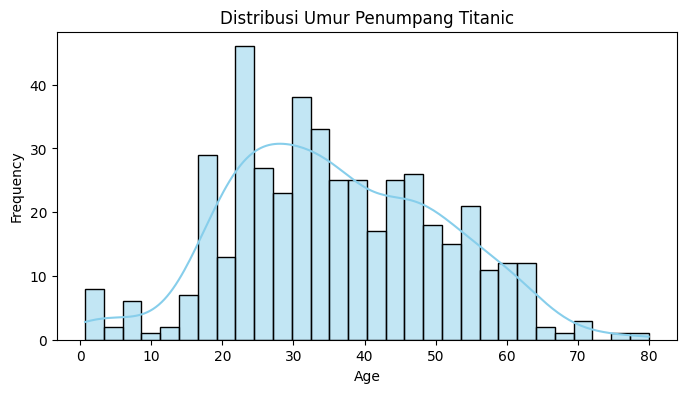

Skewness: 0.15


In [17]:
# Visualisasi distribusi umur
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Umur Penumpang Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Menghitung nilai skewness
skew_value = data['age'].skew()
print(f"Skewness: {skew_value:.2f}")

In [18]:
data[column].fillna(data[column].mean(), inplace=True)

<ipython-input-18-16da9731c914>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-18-16da9731c914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(data[column].mean(), inplace=True)


In [19]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


**Duplicate** dan** Missing Values** pada data telah berhasil diselesaikan. Pada hasil akhir menunjukkan bahwa data yang bisa digunakan terdapat **499** baris **tanpa adanya missing value**.

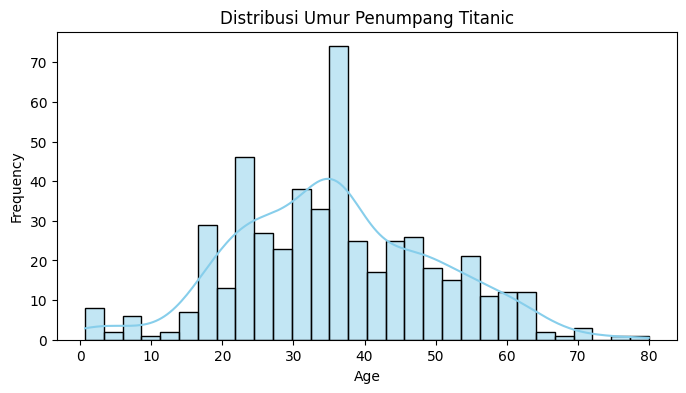

Skewness: 0.15


In [21]:
# Visualisasi distribusi umur
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Umur Penumpang Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Menghitung nilai skewness
skew_value = data['age'].skew()
print(f"Skewness: {skew_value:.2f}")

# Visualisasi EDA

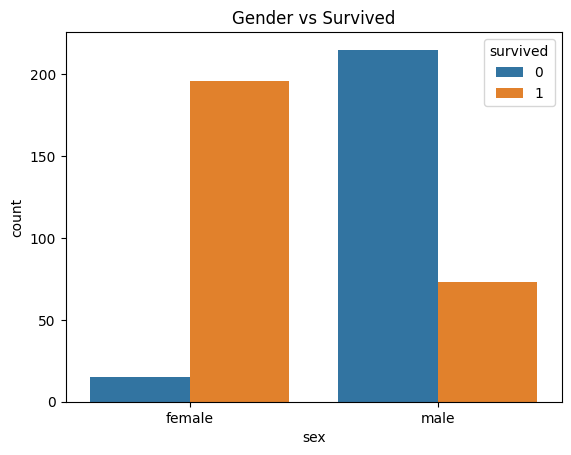

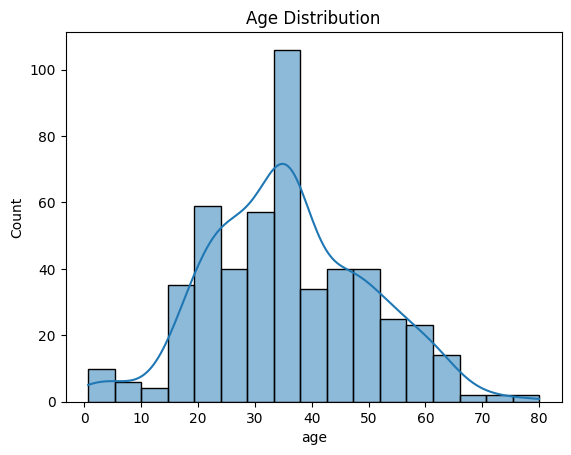

In [22]:
# Plot gender vs survived
sns.countplot(data=data, x='sex', hue='survived')
plt.title('Gender vs Survived')
plt.show()

# Plot age distribution after imputation
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#Analisis Survival Rate


In [23]:
# Menghitung survival rate per gender
survival_by_gender = data.groupby('sex')['survived'].mean().reset_index()
survival_by_gender


,sex,survived
0,female,0.928910
1,male,0.253472


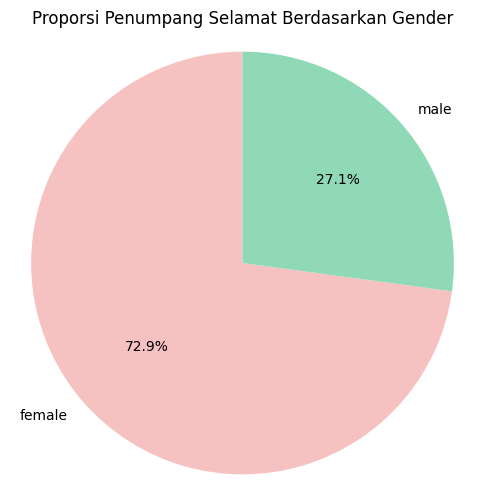

In [24]:
# Hitung jumlah yang selamat berdasarkan gender
survived_counts = data[data['survived'] == 1]['sex'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90, colors=['#f6c1c1', '#8fd9b6'])
plt.title('Proporsi Penumpang Selamat Berdasarkan Gender')
plt.axis('equal')  # Biar pie-nya bulat
plt.show()


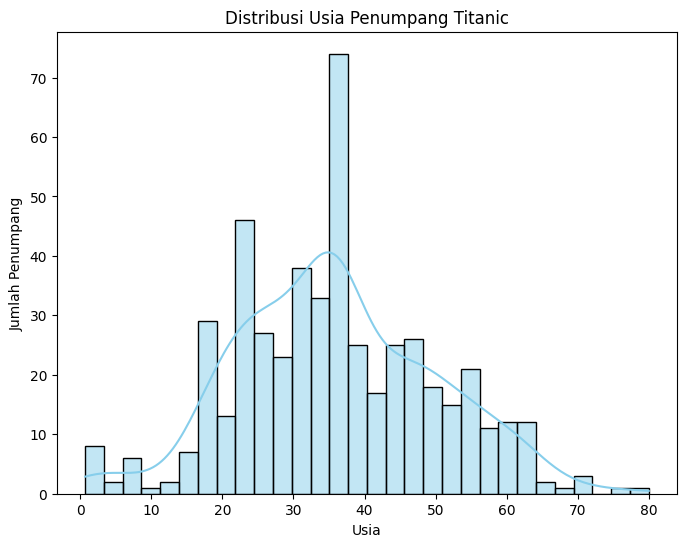

In [25]:
# Visualisasi distribusi usia penumpang
plt.figure(figsize=(8,6))
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Usia Penumpang Titanic')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.show()


In [26]:
# Membuat kategori usia dengan 4 kelompok
def age_group(age):
    if age < 13:
        return 'Children'
    elif age < 20:
        return 'Teenager'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'
data['age_group'] = data['age'].apply(age_group)


<ipython-input-26-5152d734c653>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = data['age'].apply(age_group)


<ipython-input-27-054a5e93a762>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=survival_by_age_group, x='age_group', y='survived', order=order, palette='viridis')


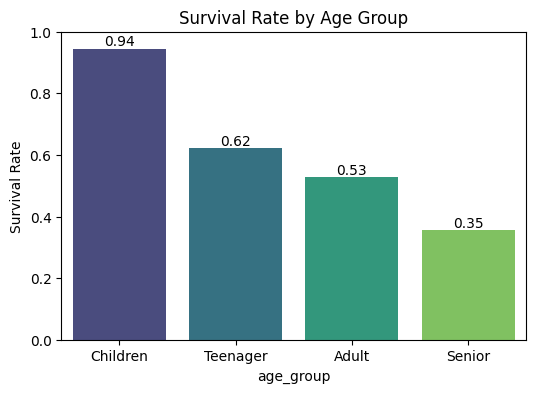

In [27]:
# Hitung survival rate berdasarkan kategori umur
survival_by_age_group = data.groupby('age_group')['survived'].mean().reset_index()

order = ['Children', 'Teenager', 'Adult', 'Senior']

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=survival_by_age_group, x='age_group', y='survived', order=order, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

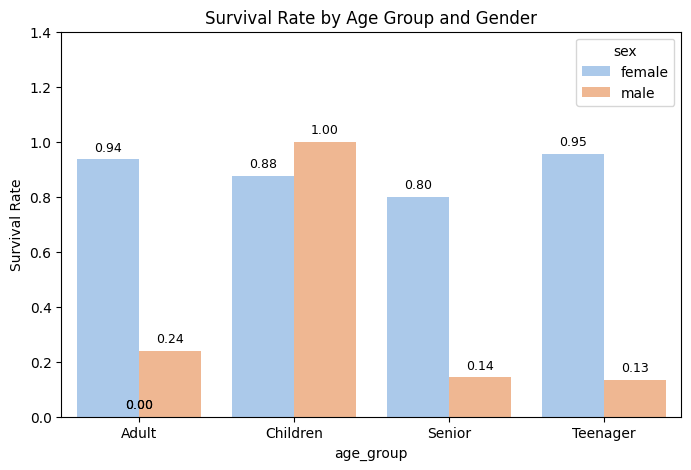

In [28]:
# Gabungan analisis gender dan age group
grouped = data.groupby(['sex', 'age_group'])['survived'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(data=grouped, x='age_group', y='survived', hue='sex', palette='pastel')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height + 0.02),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title('Survival Rate by Age Group and Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1.4)
plt.show()

# Feature Engineering

In [29]:
data.sample(5)

,survived,name,sex,age,age_group
353,1,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,Adult
203,0,"Meyer, Mr. Edgar Joseph",male,28.0,Adult
141,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,Adult
282,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,Adult
497,0,"Matthews, Mr. William John",male,30.0,Adult


In [30]:
data_cleaned = data.drop(['name',"age_group"], axis=1)
data_cleaned.head()

,survived,sex,age
0,1,female,29.0000
1,1,male,0.9167
2,0,female,2.0000
3,0,male,30.0000
4,0,female,25.0000


In [31]:
le = LabelEncoder()
data_cleaned['sex'] = le.fit_transform(data_cleaned['sex'])  # Males = 1, Females = 0

In [32]:
data_cleaned.head()

,survived,sex,age
0,1,0,29.0000
1,1,1,0.9167
2,0,0,2.0000
3,0,1,30.0000
4,0,0,25.0000


In [33]:
# Menampilkan nama kolom dalam dataset
print(data_cleaned.columns)

Index(['survived', 'sex', 'age'], dtype='object')


# Feature Importance Modelling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
X = data_cleaned.drop(['survived'], axis=1)
y = data_cleaned['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


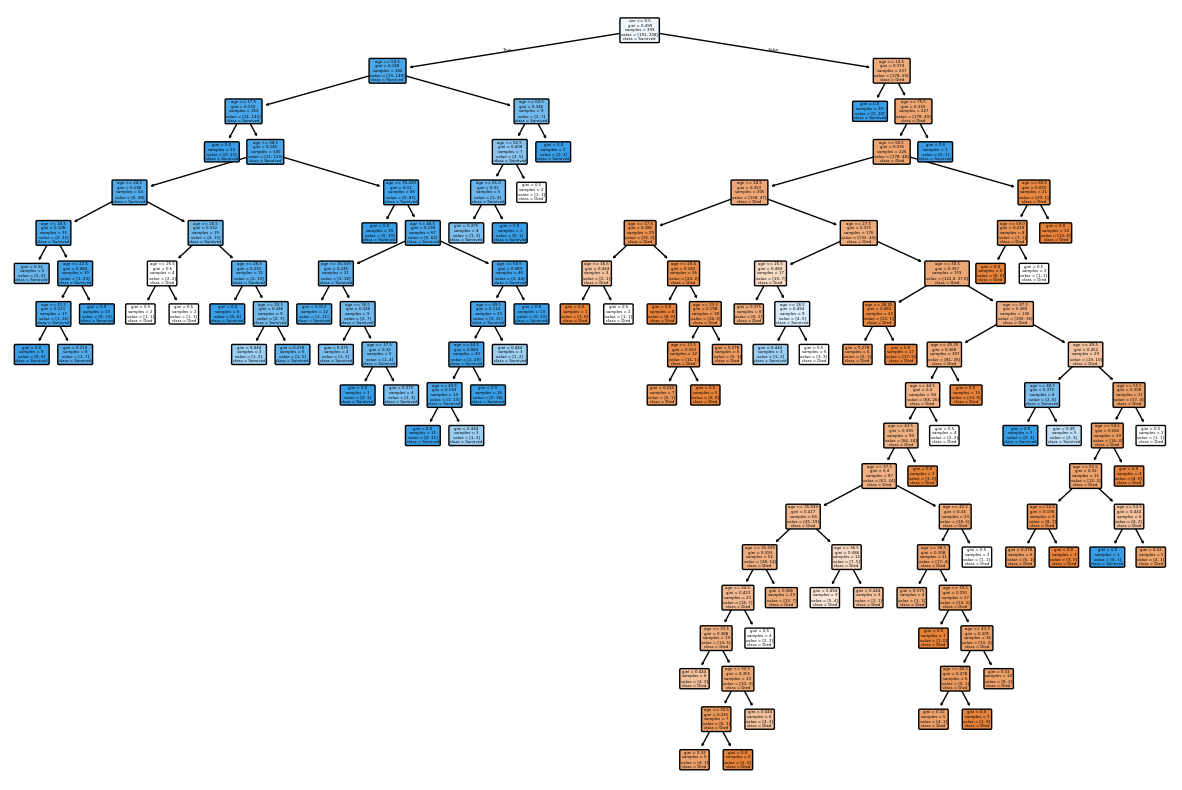

<Figure size 1000x600 with 0 Axes>

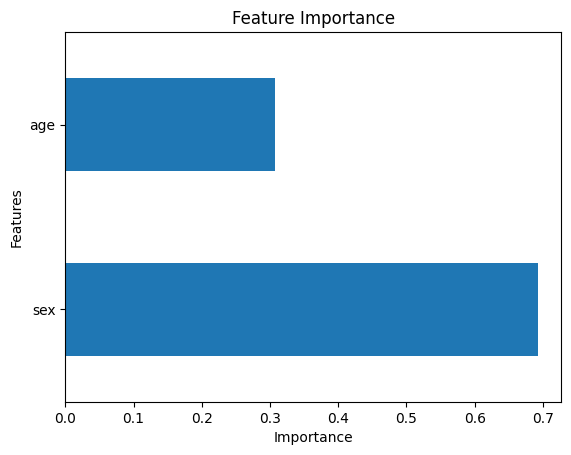

,Importance
sex,0.692198
age,0.307802


In [38]:
# Model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Visualisasi Pohon Keputusan
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['Died', 'Survived'], rounded=True)
plt.show()

# Menampilkan Fitur yang Paling Berpengaruh
feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Output
plt.figure(figsize=(10,6))
feature_importance.plot(kind='barh', legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Menampilkan data feature importance
feature_importance.head()
